# Import Libraries , Function and Data #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
milk = pd.read_csv("/kaggle/input/milkquality/milknew.csv")

In [3]:
milk.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
milk.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [5]:
milk.shape

(1059, 8)

# Data Cleaning and Visulization

In [6]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [7]:
milk.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [8]:
milk.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

<AxesSubplot:>

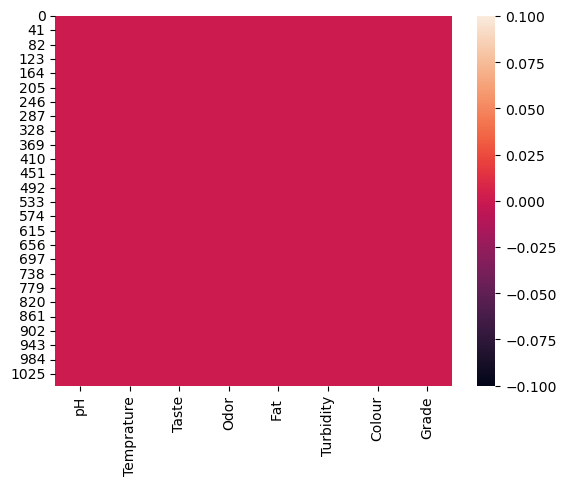

In [9]:
sns.heatmap(milk.isnull())

In [10]:
milk.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


<AxesSubplot:>

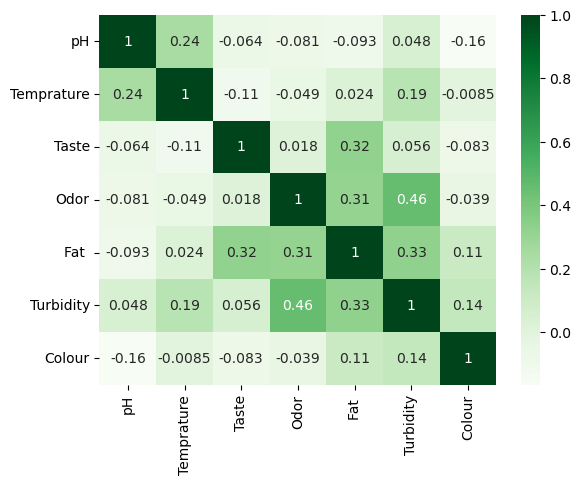

In [11]:
sns.heatmap(milk.corr(),annot=True,cmap="Greens")

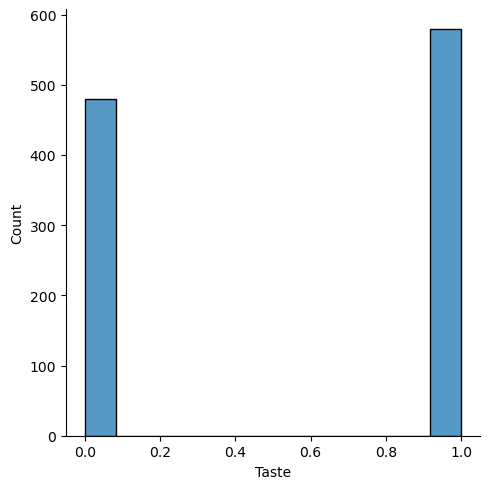

In [12]:
sns.displot(milk['Taste'])

<AxesSubplot:ylabel='Taste'>

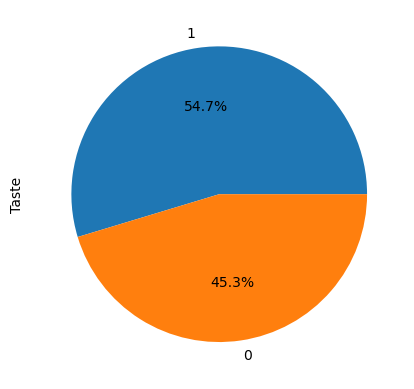

In [13]:
milk['Taste'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:ylabel='Grade'>

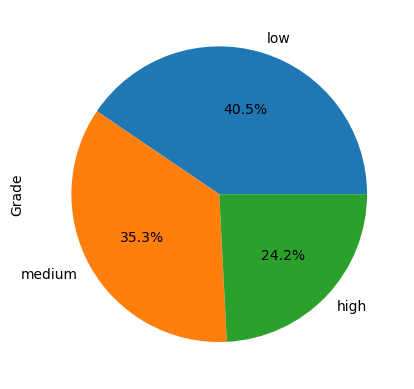

In [14]:
milk['Grade'].value_counts().plot(kind='pie',autopct='%1.1f%%')

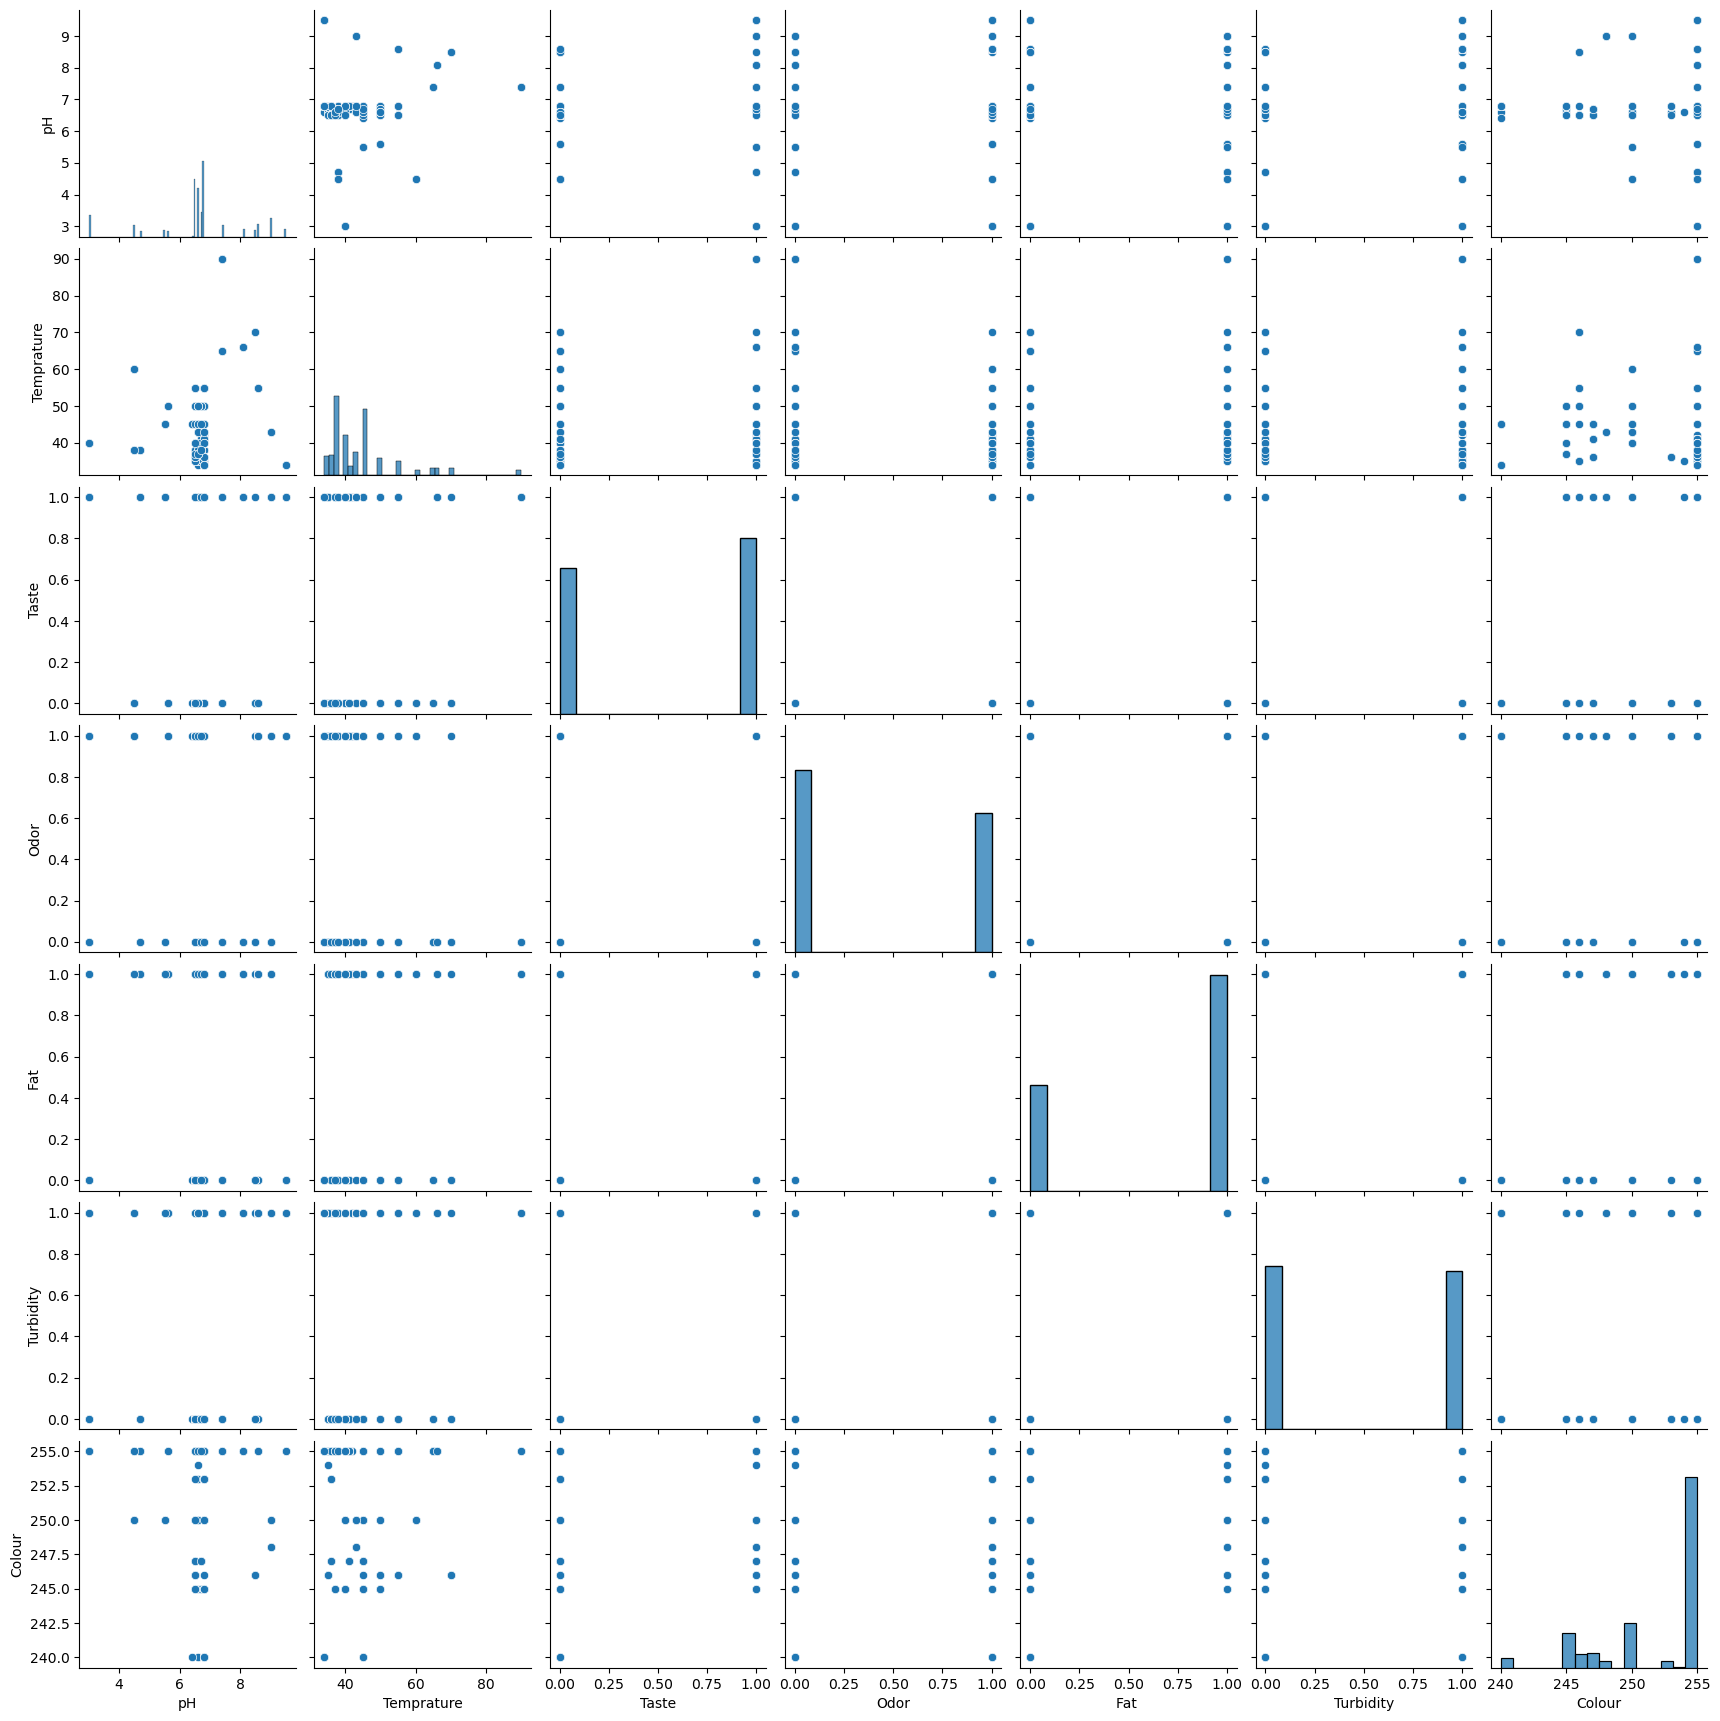

In [15]:
sns.pairplot(milk)

In [16]:
milk.head(3)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low


# Preprocessing.LabelEncoder Convert String to Number #

In [17]:
label_encoder = preprocessing.LabelEncoder()

milk['Grade']= label_encoder.fit_transform(milk['Grade'])

milk['Grade'].unique()

array([0, 1, 2])

In [18]:
milk.head(3)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1


In [19]:
milk__feature = ['pH','Temprature','Taste','Odor','Turbidity','Colour']

x = milk[milk__feature]

y = milk['Grade']

In [20]:
x.head()

,pH,Temprature,Taste,Odor,Turbidity,Colour
0,6.6,35,1,0,0,254
1,6.6,36,0,1,1,253
2,8.5,70,1,1,1,246
3,9.5,34,1,1,1,255
4,6.6,37,0,0,0,255


In [21]:
y.head()

0    0
1    0
2    1
3    1
4    2
Name: Grade, dtype: int64

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.head()

,pH,Temprature,Taste,Odor,Turbidity,Colour
362,6.8,34,0,0,1,240
16,4.7,38,1,0,0,255
397,6.8,36,0,1,0,253
123,6.8,45,1,1,1,245
896,6.6,38,0,0,0,255


In [23]:
y_train.head()

362    2
16     1
397    0
123    0
896    2
Name: Grade, dtype: int64

In [24]:
x_test.head()

,pH,Temprature,Taste,Odor,Turbidity,Colour
952,6.8,34,0,0,1,240
826,6.5,38,1,0,0,255
969,6.7,45,1,1,0,247
573,6.8,41,0,0,0,255
523,5.6,50,0,1,1,255


In [25]:
y_test.head()

952    2
826    2
969    2
573    2
523    1
Name: Grade, dtype: int64

# RandomForest Model #

In [26]:
from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier()

In [27]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
model.score(x_train,y_train)*100

100.0

In [29]:
model.score(x_test,y_test)*100

99.05660377358491

# KNeighbors Model #

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [31]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
model.score(x_train,y_train)*100

98.93742621015348

In [33]:
model.score(x_test,y_test)*100

99.52830188679245

# Thank You #